In [4]:
import pandas as pd

train_df = pd.read_csv('cleaned_train.csv')
test_df = pd.read_csv('cleaned_test.csv')
ID = test_df['ID']

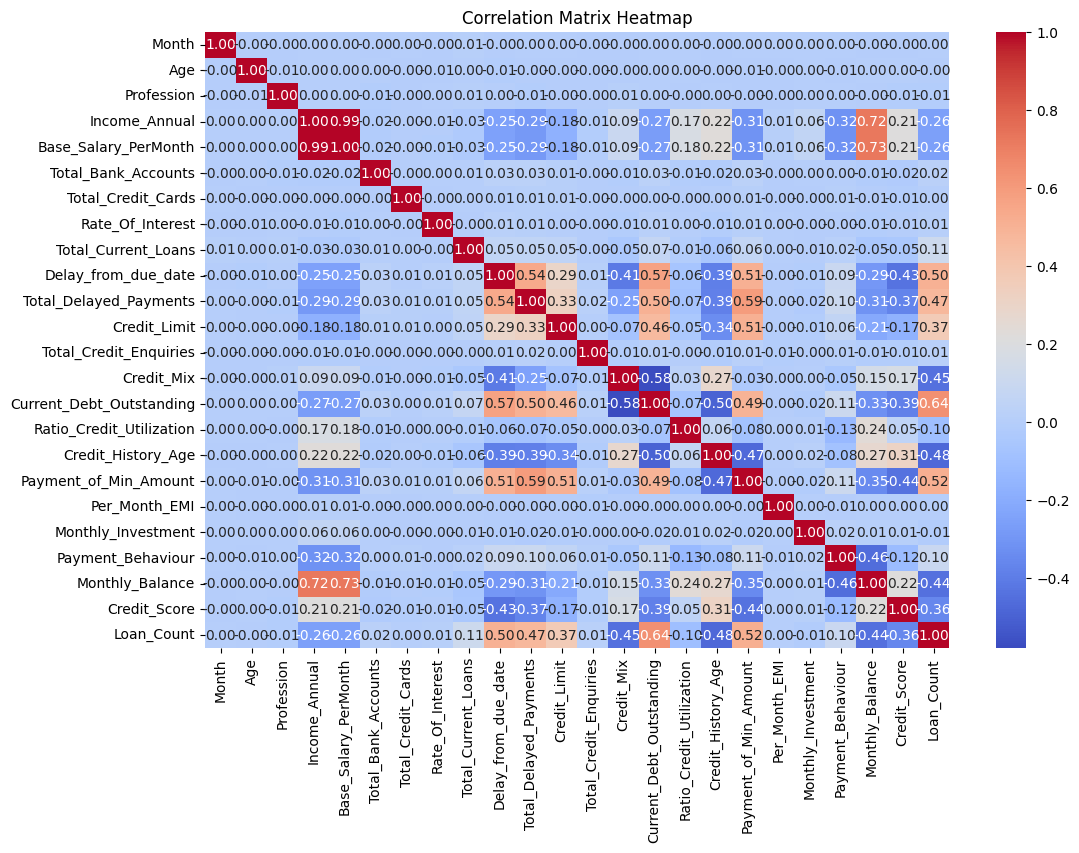

In [5]:
import seaborn as sns

import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = train_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Define the features and target variable
X = train_df.drop(columns=['Credit_Score'])
y = train_df['Credit_Score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.5512129380053908
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.36      0.43      4570
           1       0.56      0.82      0.66      8267
           2       0.42      0.07      0.12      2745

    accuracy                           0.55     15582
   macro avg       0.51      0.42      0.41     15582
weighted avg       0.53      0.55      0.50     15582



- Remove all coloumns which have correlation less than 0.1 with credit score and do logistic regression

In [12]:
# Get the correlation of all columns with 'Credit_Score'
correlation_with_target = corr_matrix['Credit_Score'].abs()

# Select columns with correlation greater than or equal to 0.1
selected_features = correlation_with_target[correlation_with_target >= 0.1].index

# Drop columns with correlation less than 0.1
X_filtered = X[selected_features.drop('Credit_Score')]

# Split the data into training and testing sets
X_train_filtered, X_test_filtered, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
log_reg_filtered = LogisticRegression(max_iter=1000)

# Fit the model on the training data
log_reg_filtered.fit(X_train_filtered, y_train)

# Predict on the test data
y_pred_filtered = log_reg_filtered.predict(X_test_filtered)

# Evaluate the model
accuracy_filtered = accuracy_score(y_test, y_pred_filtered)
report_filtered = classification_report(y_test, y_pred_filtered)

print(f'Accuracy: {accuracy_filtered}')
print('Classification Report:')
print(report_filtered)

Accuracy: 0.5893980233602875
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.42      0.50      4570
           1       0.59      0.79      0.68      8267
           2       0.51      0.27      0.35      2745

    accuracy                           0.59     15582
   macro avg       0.57      0.49      0.51     15582
weighted avg       0.58      0.59      0.57     15582



- accuracy increased from 55.12% to 58.93% after removing columns which were not correlating that much with credit score

[[1630 2898   42]
 [1278 6763  226]
 [  58 2491  196]]


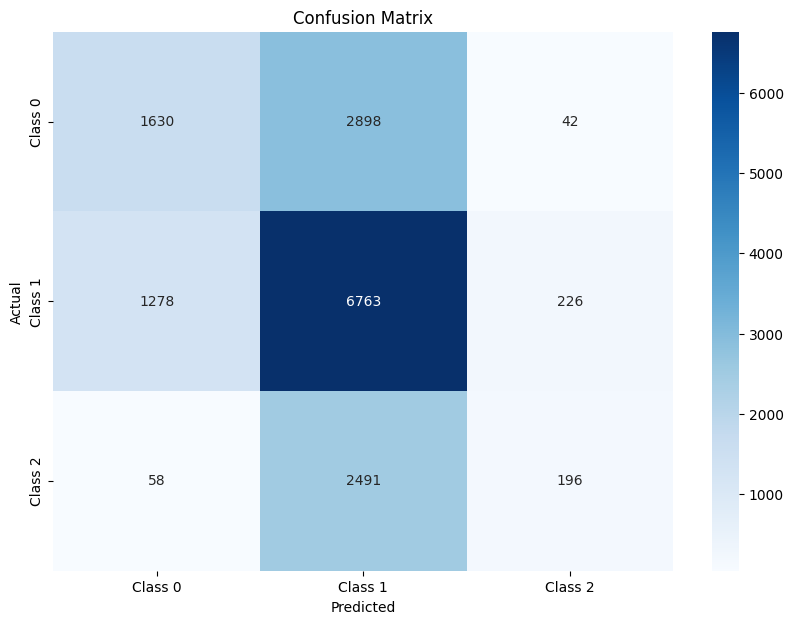

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
import matplotlib.pyplot as plt

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
# Ensure the test set has the same features as the training set
X_test_filtered = test_df[selected_features.drop('Credit_Score')]

# Make predictions on the test set
y_test_filtered = log_reg_filtered.predict(X_test_filtered)
y_pred_test_filtered = pd.Series(y_test_filtered).map({0: 'Poor', 1: 'Standard', 2: 'Good'})

# Create the final dataframe and save to CSV
final = pd.DataFrame({'ID': test_df['ID'], 'Credit_Score': y_pred_test_filtered})
final.to_csv('logistic_reg.csv', index=False)